# Live Training for Pearson Learning
## Time Series Analysis and Forecasting for Beginners
## July 10, 2020


### Section 1: Introduction to the Course and Time Series Analysis

# Abstract

Time series forecasting is both a fascinating subject to study and an important technique applied in industry, government, and academic settings. Example applications include demand and inventory planning, marketing strategy planning, capital budgeting, pricing, machine predictive maintenance, and macroeconomic forecasting, just to name a few. Forecasting typically requires time series data, and time series data is ubiquitous nowadays, both within and outside of the data science field, such as weekly initial unemployment claims, tick-level stock prices, weekly company sales, daily number of steps taken recorded by a wearable, machine performance measurements recorded by sensors, and key performance indicators of business functions. 
 
This training provides an introduction to time series analysis and forecasting, covering the key differences between time series data and cross-sectional data, manipulation of time series data, exploratory time series data analysis using statistics (and their graphical representations), and one of the most important classes of statistical time series models; AutoRegression Integrated Moving Average (ARIMA) models and its Seasonal counterpart (SARIMA) with and without explanatory variables. As some of the most important and commonly used data science techniques to analyze time series data and make forecasts based on those developed in the field of statistics and machine learning, this introductory time series training provides the practical foundations for conducting time series analysis and forecasting.

# Learning Objectives

The attendees will learn the following concepts and techniques in this training course:
 
  * The key characteristics, which are distinguished from non-time series data, of time series data
  * Statistics for summarizing time series
  * Graphical techniques to describe characteristics of time series
  * Common use cases of the class of ARIMA models
  * Essential concepts required to appropriately apply the class of ARIMA models in practice, such as 
      * Mathematical formulation of this class of model
      * Statistical assumptions of this class of model
      * Implementation of these models in Python using simulated and real-world time-series data
      * ARIMA model selection
      * Assumption testing and model evaluation
      * Forecasting
  * The advantages and disadvantages of the class of ARIMA models

# Outline of the Course

## 1. Introduction to time series analysis
Length (40 min, including 10 minutes for exercise and a 10-minute break)

  - 1.1 Introduction and welcome to the course
  - 1.2 Common use cases of time series analysis from different disciplines
  - 1.3 Common characteristics and patterns of time series
  - 1.4 The class of models to be covered today: A demo
  - Exercise 1

  
## 2. Exploratory Time Series Data Analysis and ARMA Model Formulation
Length (60 min, including 10 minutes for exercise and a 10-minute break)

  - 2.1 A brief discussion on the notion of stochastic processes, time series, stationarity, and basic terminology of time series analysis
  - 2.2 Exploratory Time Series Data Analysis
  - 2.3 Mathematical formulation of AR, MA, and ARMA models
  - 2.4 Lag (or backshift) operators
  - 2.5 Properties of the general Autoregressive model of order p (AR(p))
  - 2.6 Properties of the general Moving Average model of order q (MA(q))
  - Exercise 2

  
## 3. ETSDA, ARIMA Model Formulation
Length (60 min, including 10 minutes for exercise and a 10-minute break)

  - 3.1 Notion of non-stationarity
  - 3.2 Mathematical formulation of ARIMA models
  - 3.3 The Box-Jenkins Approach to ARIMA Modeling of non-stationary time series
  - Exercise 3


## 4. ARIMA  Modeling
Length (60 min, including 10 minutes for exercise and a 10-minute break)

  - 4.1 Model Identification
  - 4.2 Model Diagnostic Checking
  - 4.3 Model performance evaluation (in-sample fit)
  - 4.4 Forecasting and forecast evaluation 
  - 4.5 Incorporation of explanatory variables, its use cases, and its practical suggestions
  - Exercise 4


## 5. Seasonal ARIMA Modeling
Length (60 min, including 10 minutes for exercise and a 10-minute break)

  - 5.1 Understanding seasonality and examination of seasonal time series
  - 5.2 Mathematical formulation of Seasonal ARIMA (SARIMA) models
  - 5.3 Building a seasonal ARIMA model for forecasting
  - Exercise 5


## 6. Closing Remarks: Practical suggestions and other topics
Length (20 min)

  - 6.1 Model selection heuristics
  - 6.2 Course wrap-up and next steps, and where to go from here

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

# Common characteristics of time series

* Trend
* Seasonality
* Cycles
* Combination of the above (such as a trend with seasonality)

### Pattern 1a: Trend

Example: Number of ocean cruise passengers worldwide

In [2]:
d = {'passengers': [17.8, 19.1, 20.5, 20.9, 21.3, 22.34, 23.06, 25.2, 26.7, 28.5, 30],
     'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

cruise_passengers = pd.DataFrame(data=d).set_index('year')

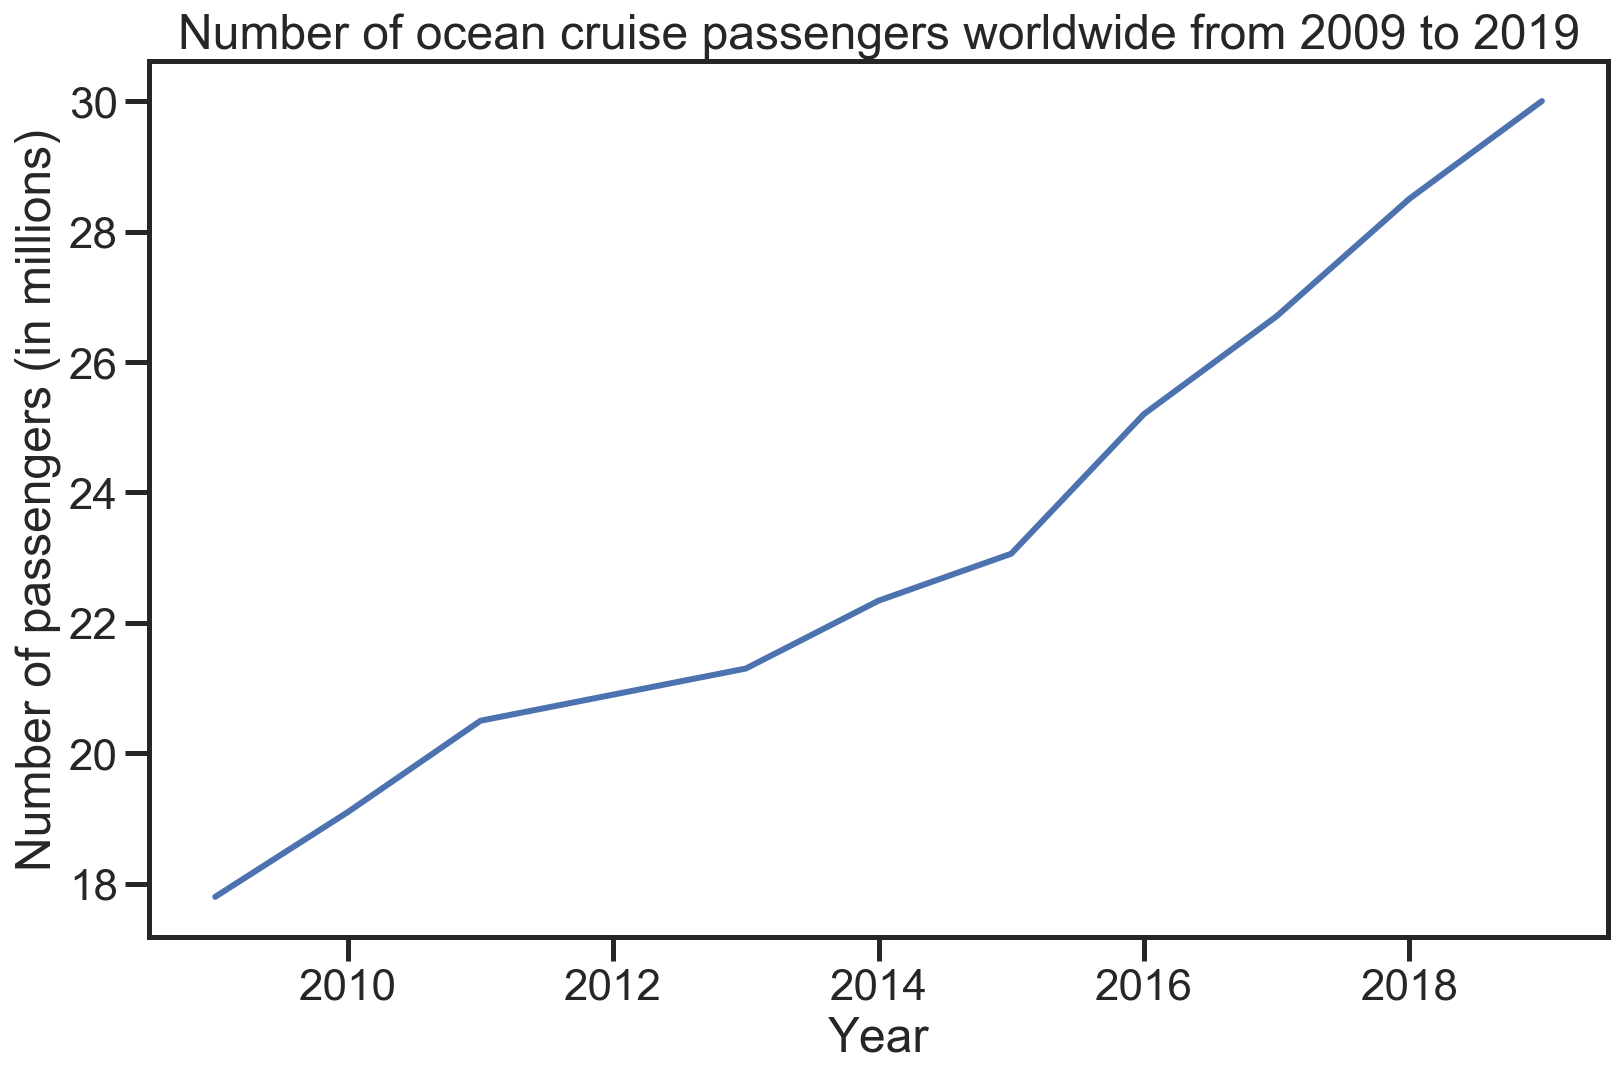

In [3]:
fig, ax = plt.subplots(figsize=(12,8));

cruise_passengers['passengers'].plot(ax=ax);

ax.set_title('Number of ocean cruise passengers worldwide from 2009 to 2019');
ax.set_ylabel('Number of passengers (in millions)');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

### Pattern 1b: Trend and Fluctuation around the Trend

Airline Passenger Bookings

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60

- `data/international-airline-passengers.csv`


In [4]:
air = pd.read_csv('data/international-airline-passengers.csv', header=0, index_col=0, parse_dates=[0])

In [5]:
air

,n_pass_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


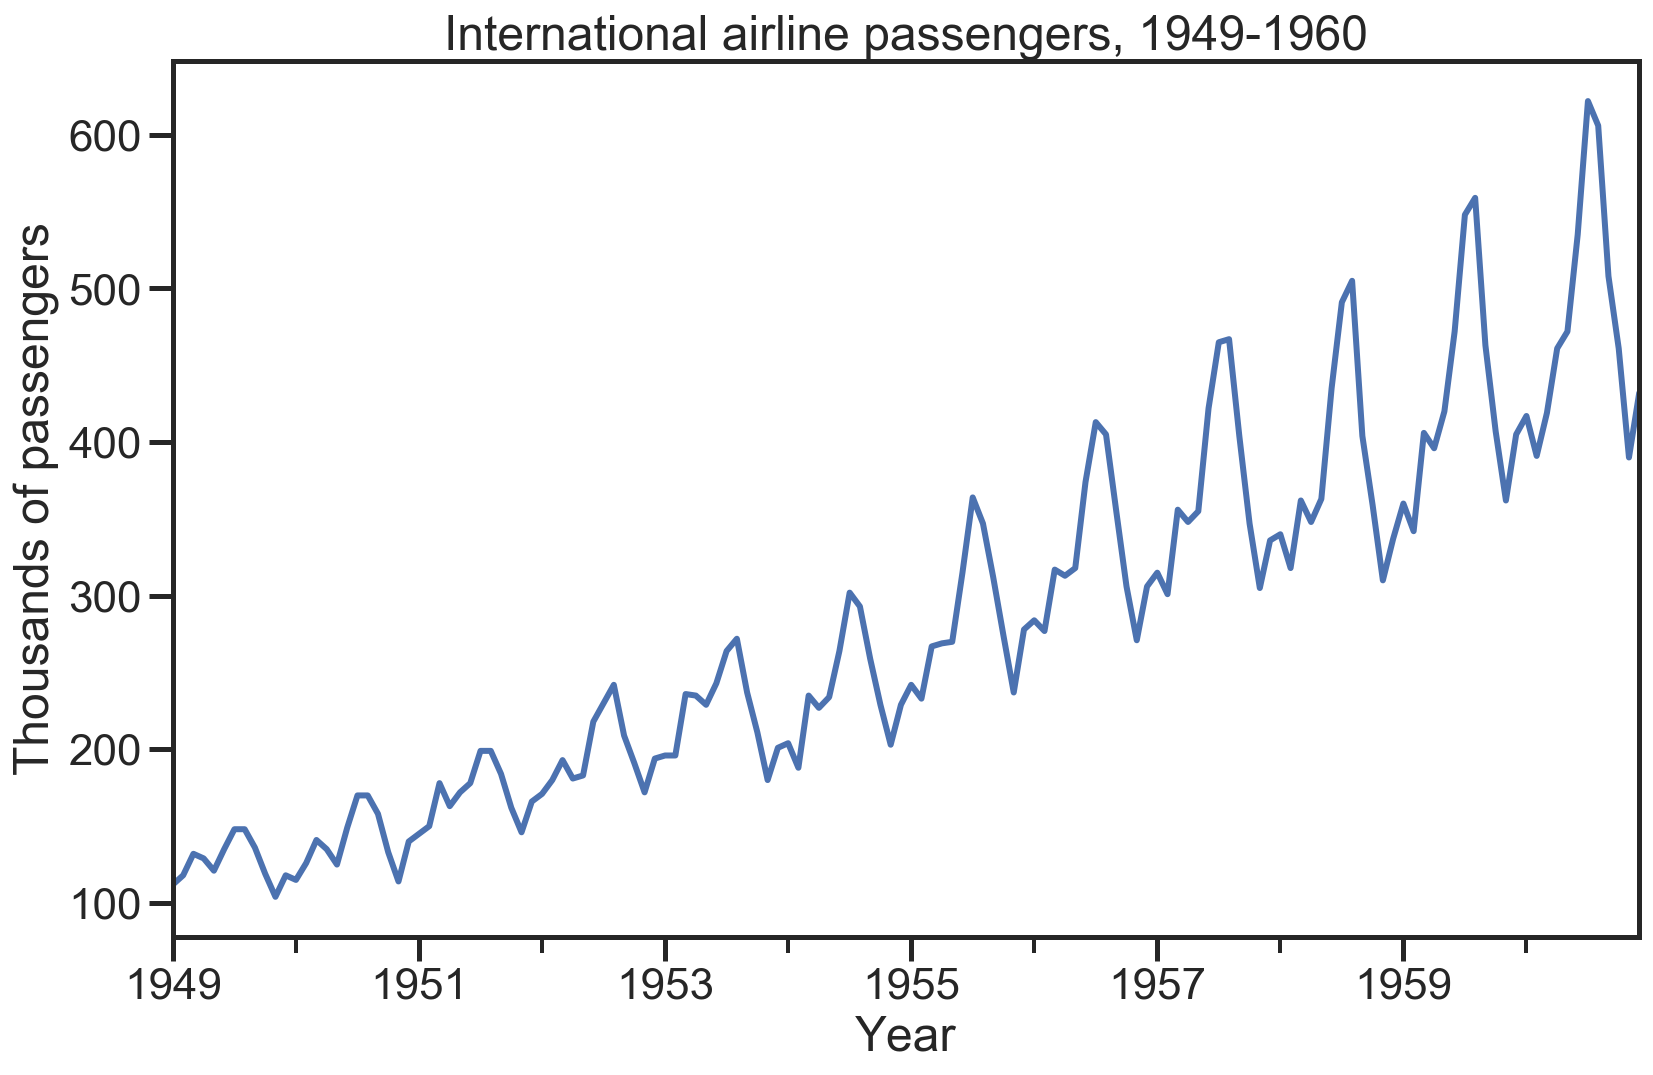

In [6]:
fig, ax = plt.subplots(figsize=(12,8));

air['n_pass_thousands'].plot(ax=ax);

ax.set_title('International airline passengers, 1949-1960');
ax.set_ylabel('Thousands of passengers');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

**In fact, this specific fluctuation pattern is called "seasonality".**

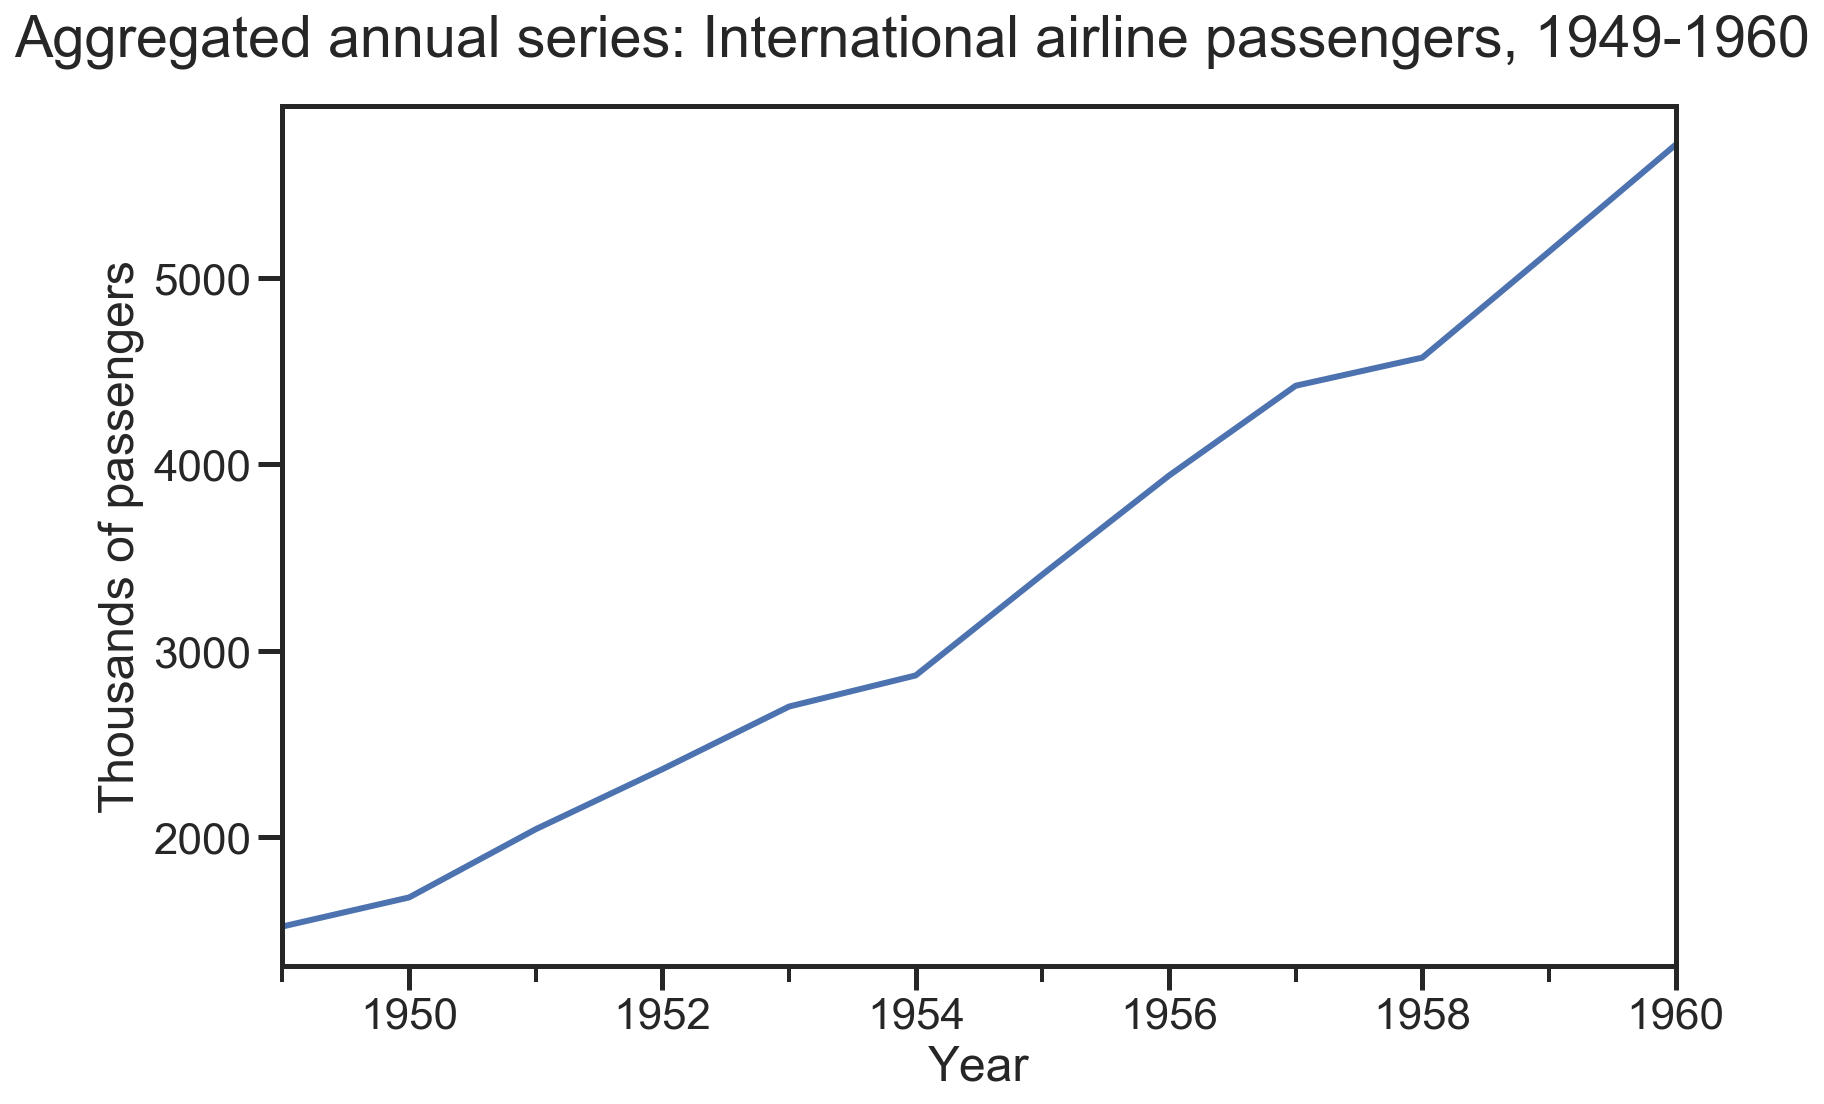

In [7]:
# Examine annual trend in the data
fig, ax = plt.subplots(figsize=(12,8));

air['n_pass_thousands'].resample('AS').sum().plot(ax=ax)

# ax.set_title('Aggregated annual series: International airline passengers, 1949-1960');
fig.suptitle('Aggregated annual series: International airline passengers, 1949-1960');
ax.set_ylabel('Thousands of passengers');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();
fig.subplots_adjust(top=0.9)

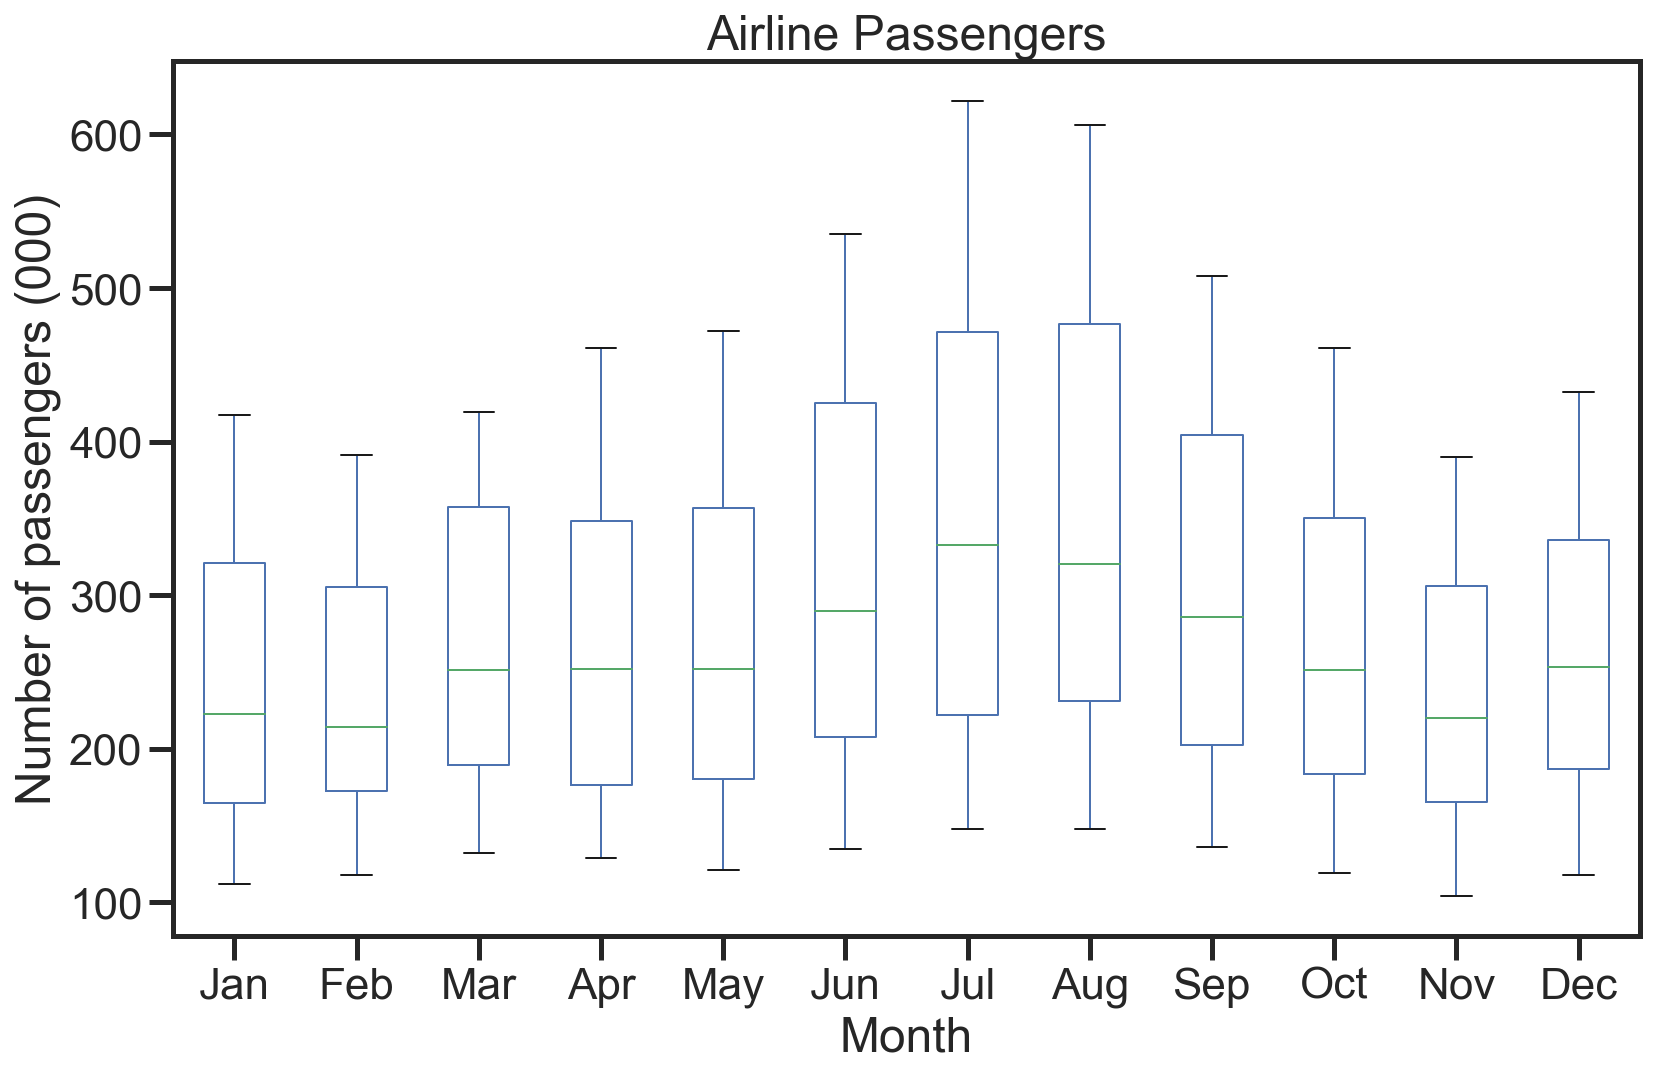

In [8]:
# Examine seasonal trend in the data
air['Month'] = air.index.strftime('%b')
air['Year'] = air.index.year

air_piv = air.pivot(index='Year', columns='Month', values='n_pass_thousands')

air = air.drop(['Month', 'Year'], axis=1)

# put the months in order
month_names = pd.date_range(start='2016-01-01', periods=12, freq='MS').strftime('%b')
air_piv = air_piv.reindex(columns=month_names)

# plot it
fig, ax = plt.subplots(figsize=(12, 8))
air_piv.plot(ax=ax, kind='box');

ax.set_xlabel('Month');
ax.set_ylabel('Number of passengers (000)');
ax.set_title('Airline Passengers');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

### Pattern 2: Trend and Change in Structure

Annual Average Global Temperature Change

http://data.giss.nasa.gov/gistemp/graphs/graph_files.html - Land-Ocean: Global Means
- `data/mixedGLB.Ts.ERSSTV4.GHCN.CL.PA.csv`

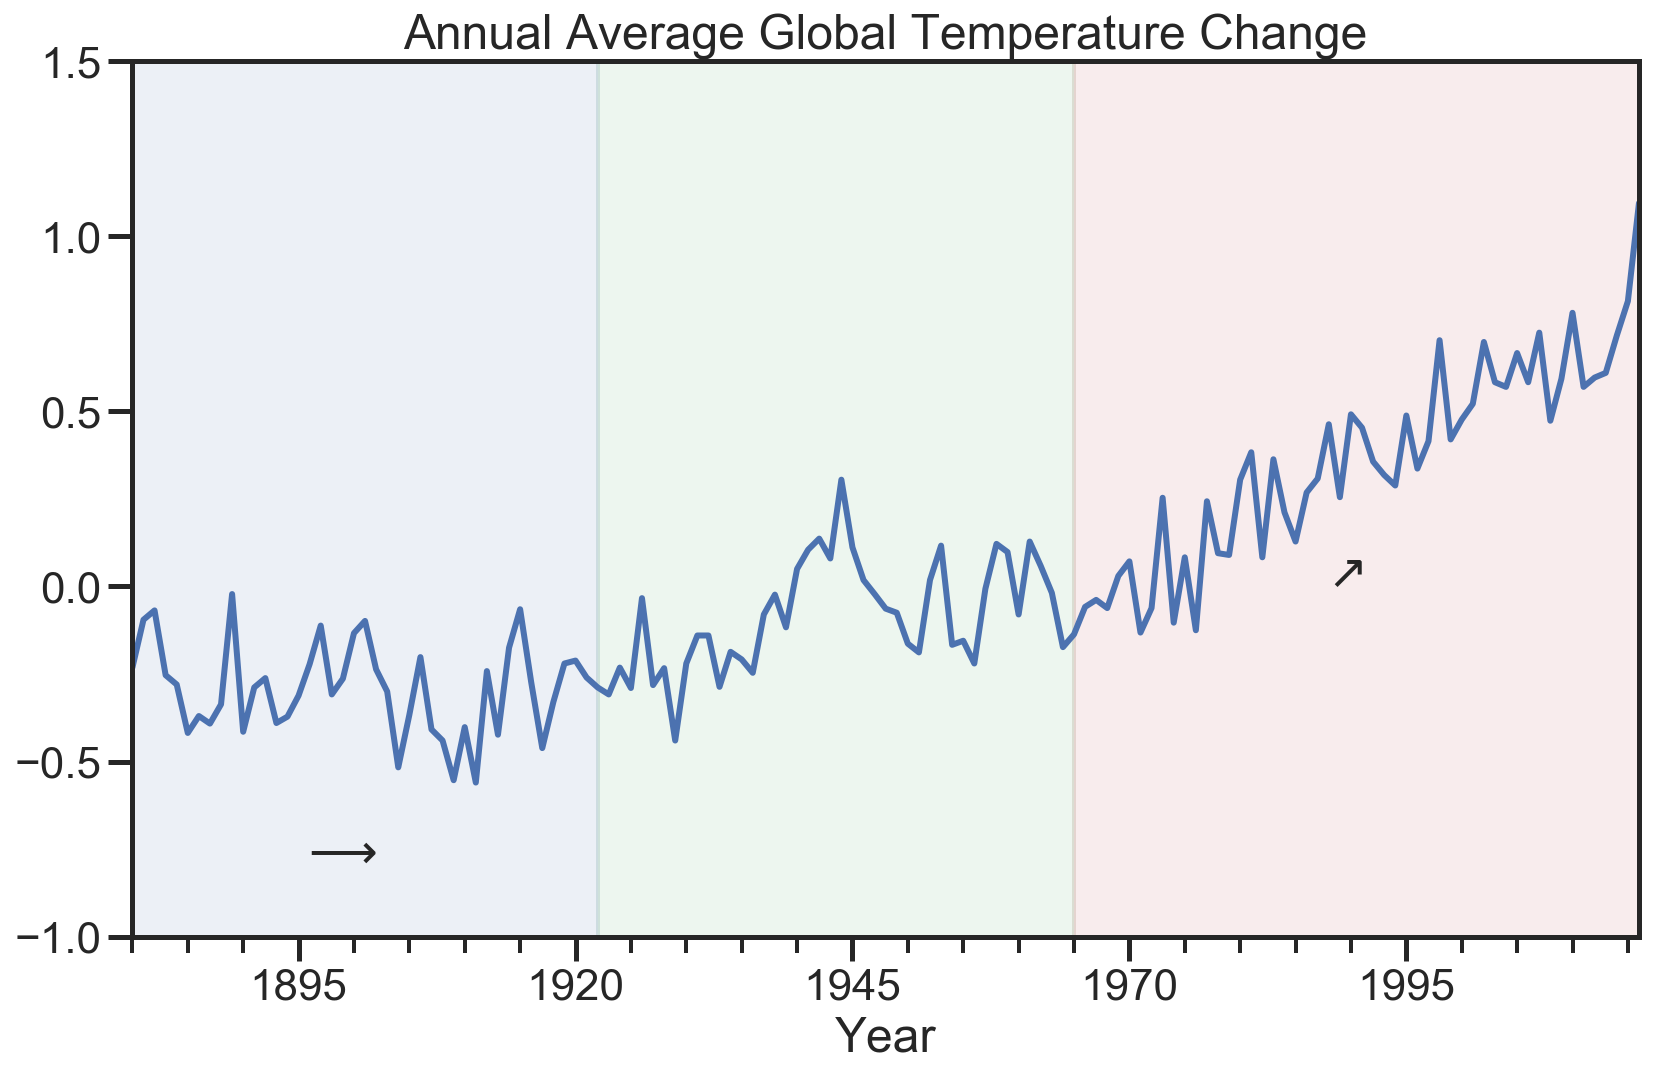

In [15]:
gtemp = pd.read_csv('data/mixedGLB.Ts.ERSSTV4.GHCN.CL.PA.csv', header=1, index_col=0, parse_dates=[0])
gtemp['avg'] = gtemp.iloc[:,:12].mean(axis=1)

fig, ax = plt.subplots(figsize=(12, 8));

gtemp['avg'].plot(ax=ax);

ax.set_title('Annual Average Global Temperature Change');

ylim = (-1.0, 1.5)
ax.set_ylim(ylim)

ax.fill_betweenx(ylim, gtemp.index[0], pd.Timestamp('1922'), alpha=.1, zorder=-1, color='b');
ax.fill_betweenx(ylim, pd.Timestamp('1922'), pd.Timestamp('1965'), alpha=.1, zorder=-1, color='g');
ax.fill_betweenx(ylim, pd.Timestamp('1965'), gtemp.index[-1], alpha=.1, zorder=-1, color='r');

ax.annotate('$\\longrightarrow$', (gtemp.index[15], -0.8));
ax.annotate('$\\nearrow$', (gtemp.index[-30], 0));
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

### Pattern 3: Variation around a Stable Mean

Dow Jones Industrial Average
- `data/dji.csv`

```python
import pandas_datareader.data as web

start = pd.Timestamp('2006-04-20')
end = pd.Timestamp('2016-04-20')

dji = web.DataReader("^DJI", 'yahoo', start, end)

dji['Return_log'] = dji['Close'].apply(lambda x: np.log(x)).diff()

dji.to_csv('data/dji.csv')
```

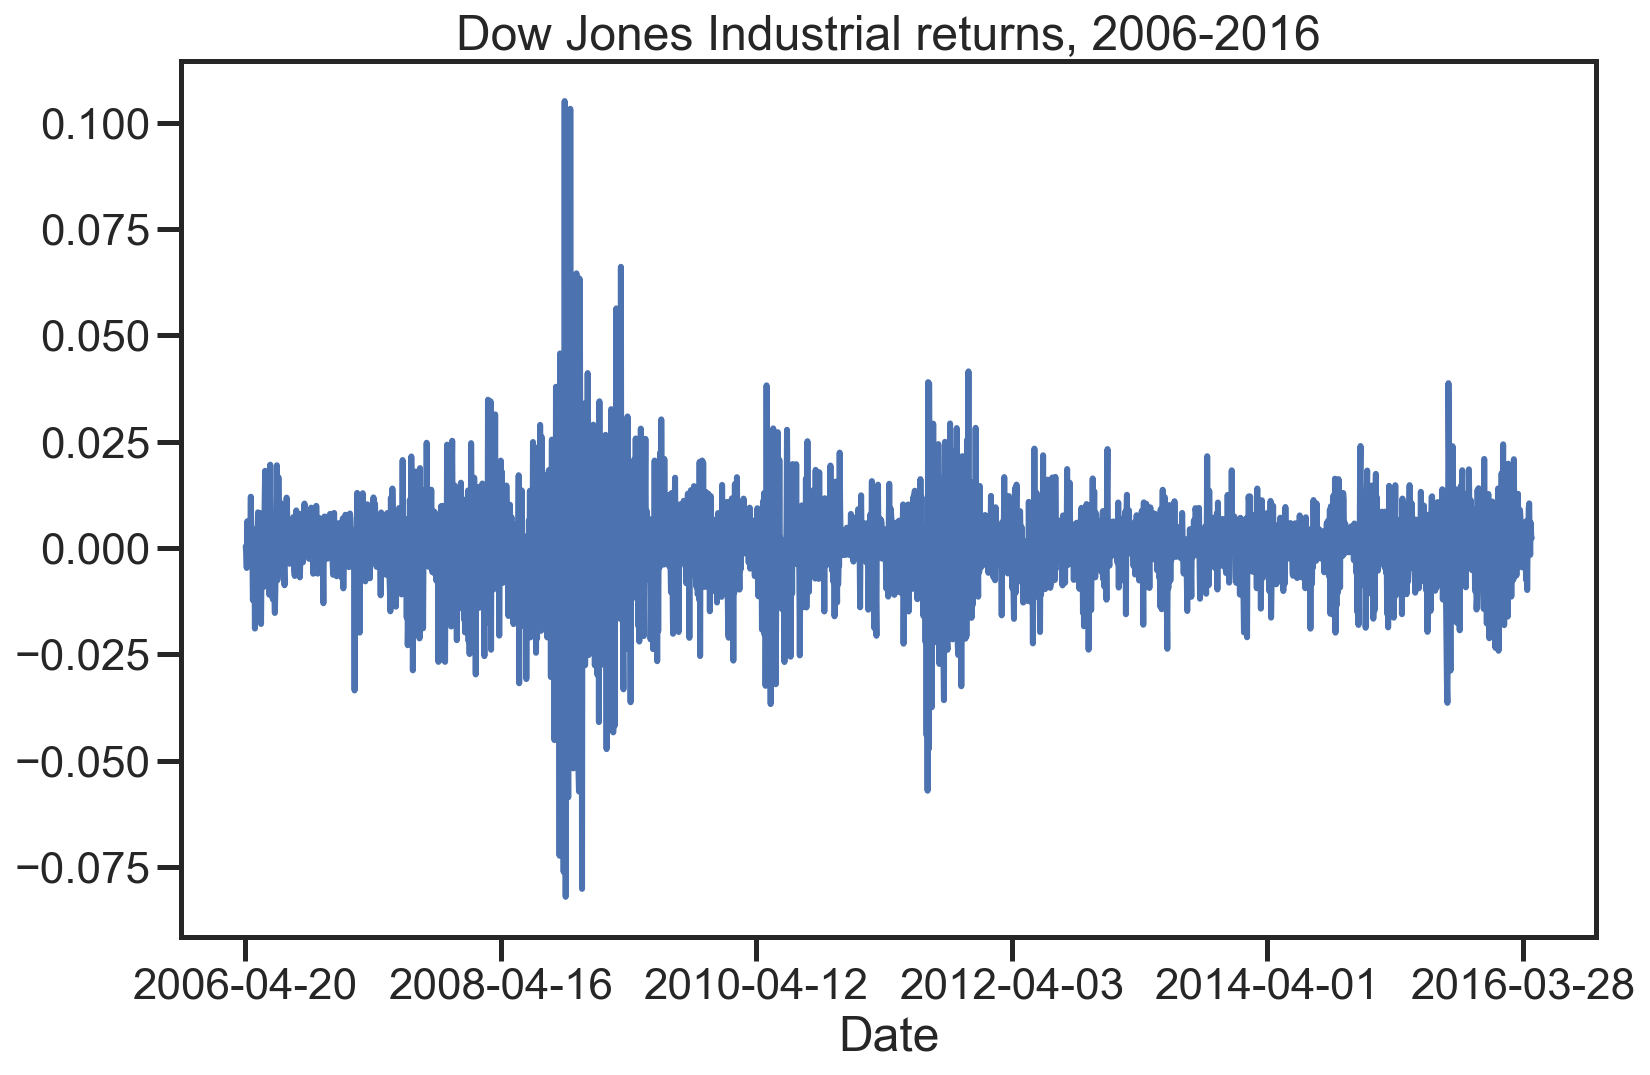

In [16]:
dji = pd.read_csv('data/dji.csv', header=0, index_col=0)

fig, ax = plt.subplots(figsize=(12, 8))

dji['Return_log'].plot(ax=ax);

ax.set_title('Dow Jones Industrial returns, 2006-2016');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

### Pattern 4: Cycles/Periodicity

Number of annual sunspots

In [11]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [12]:
sun = sm.datasets.sunspots.load_pandas().data
sun['YEAR'] = pd.to_datetime(sun['YEAR'].astype(int), format='%Y')
sun = sun.set_index('YEAR')

In [13]:
def tsplot(y, lags=None, title='', figsize=(16, 10)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

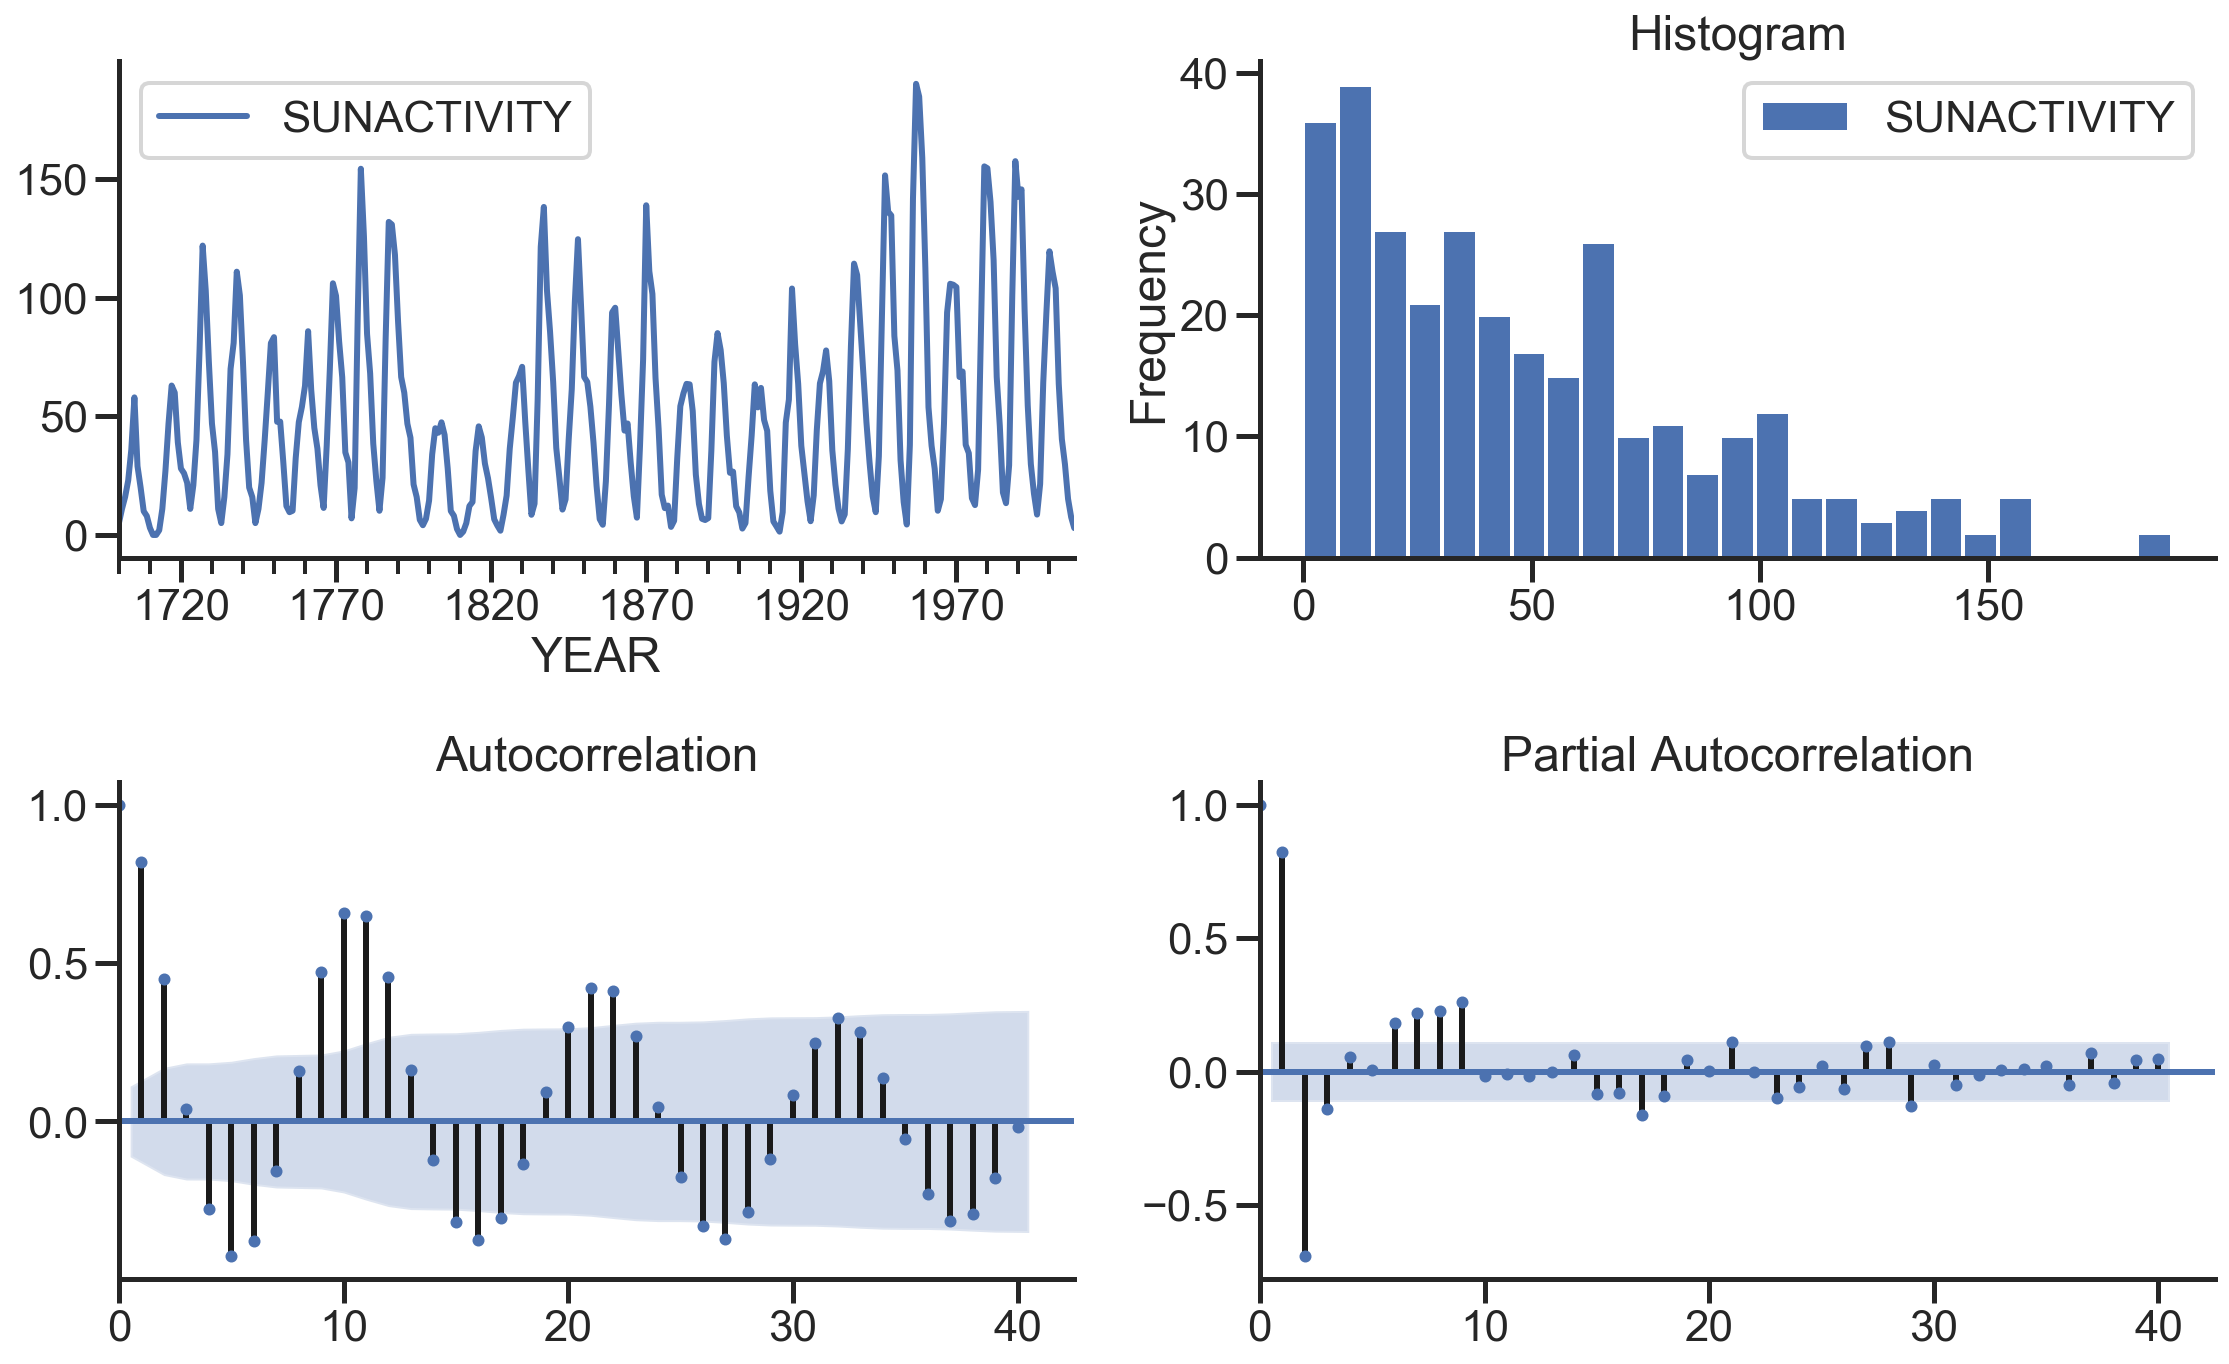

In [14]:
tsplot(sun, lags=40);

# Exericse

Take a few minutes to think of (and write down) 3 examples of time series that you have encoutered in real life.